In [171]:
import warnings
warnings.filterwarnings('ignore')

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
import matplotlib.pyplot as plt
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
from bettermdptools.utils.test_env import TestEnv
from bettermdptools.algorithms.rl import RL

In [156]:
#env = gym.make('FrozenLake-v1',is_slippery=False)
env = gym.make('FrozenLake-v1',desc=generate_random_map(size=8), is_slippery=True)

In [157]:
planner = Planner(env.P)

In [158]:
# run VI
V, V_track, policy = planner.value_iteration(gamma = 0.9)

runtime = 0.07 seconds


In [159]:
V.shape

(64,)

In [165]:
#print(policy)

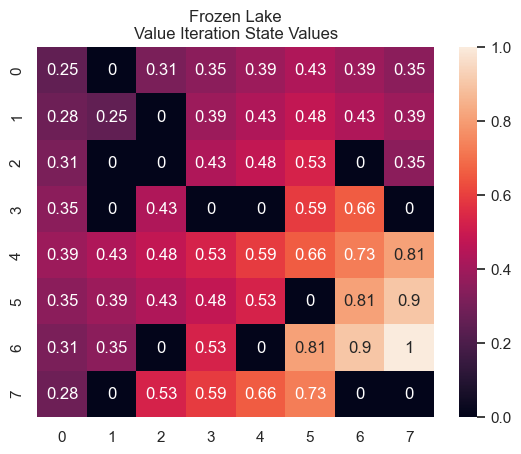

In [150]:
size=(8,8)
Plots.values_heat_map(V, "Frozen Lake\nValue Iteration State Values", size)

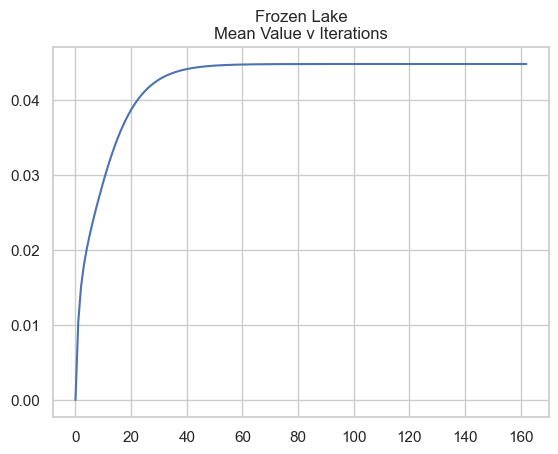

In [160]:
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "Frozen Lake\nMean Value v Iterations")

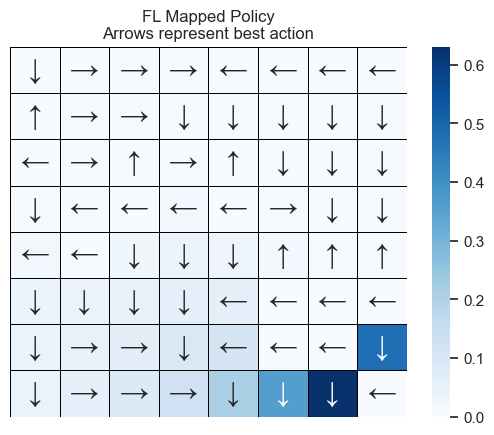

In [162]:
fl_actions = {0: "←", 1: "↓", 2: "→", 3: "↑"}
fl_map_size=(8,8)
title="FL Mapped Policy\nArrows represent best action"
val_max, policy_map = Plots.get_policy_map(policy, V, fl_actions, fl_map_size)
Plots.plot_policy(val_max, policy_map, fl_map_size, title)

In [163]:
#test policy
test_scores = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=policy, user_input=False)
print(np.mean(test_scores))


0.2554


In [164]:
total_elements = len(test_scores)
ones_count = sum(test_scores)
percentage_ones = (ones_count / total_elements) * 100
print(percentage_ones)

25.540000000000003


## Policy Iteration

In [166]:
# run VI
V_pi, V_track_pi, policy_Pi = planner.policy_iteration(gamma = 0.9)

runtime = 0.09 seconds


In [167]:
test_scores_pi = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=policy_Pi, user_input=False)
print(np.mean(test_scores_pi))

0.2492


In [168]:
total_elements = len(test_scores)
ones_count = sum(test_scores)
percentage_ones = (ones_count / total_elements) * 100
print(percentage_ones)

25.540000000000003


In [169]:
env.spec

EnvSpec(id='FrozenLake-v1', entry_point='gymnasium.envs.toy_text.frozen_lake:FrozenLakeEnv', reward_threshold=0.7, nondeterministic=False, max_episode_steps=100, order_enforce=True, autoreset=False, disable_env_checker=False, apply_api_compatibility=False, kwargs={'map_name': '4x4', 'desc': ['SFFFFHFH', 'FFFFFFFF', 'HFFFFFFF', 'FFHFHFFF', 'FHFFFFFF', 'FFFFFHFH', 'FFFFFHHF', 'FFFFFFFG'], 'is_slippery': True}, namespace=None, name='FrozenLake', version=1)

In [170]:
env.observation_space

Discrete(64)

## Q Learning

In [186]:
rl = RL(env)
Q, pi_qlearning, V_qlearning, Q_track, pi_track  = rl.q_learning()



runtime = 1.88 seconds


In [187]:
test_scores_qlearning = TestEnv.test_env(env=env, n_iters=10000, render=False, pi=pi_qlearning, user_input=False)
print(np.max(test_scores_qlearning))

0.0


In [178]:
print(Q_track.shape)

(10000, 64, 4)


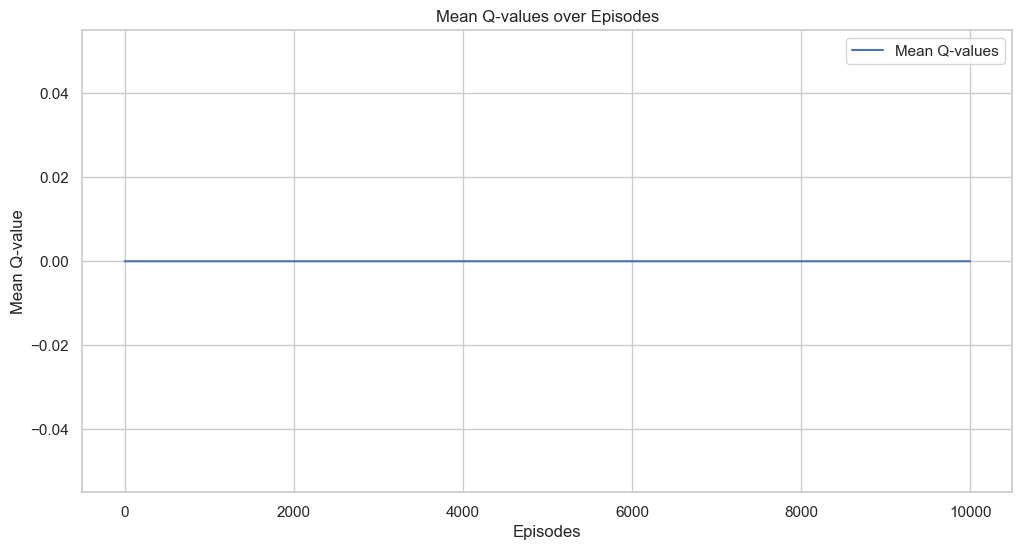

In [183]:
mean_Q_values = np.max(Q_track, axis=(1, 2))

# Plot mean Q-values over episodes
plt.figure(figsize=(12, 6))
plt.plot(mean_Q_values, label='Mean Q-values')
plt.xlabel('Episodes')
plt.ylabel('Mean Q-value')
plt.title('Mean Q-values over Episodes')
plt.legend()
plt.show()